<h1>Szymon Kobus-Puchała 245843, Analiza Danych, 4.01.2025</h1>

<h1>1. Opis problemu</h1>

<h3>a) Opisz zbiór danych, cechy i podaj źródło danych</h3>

Zbiór danych "Soybean (Large)" pochodzi z archive.ics.uci.edu. Jest to zbiór danych używany do klasyfikacji problemów związanych z chorobami soi. Składa się z 35 cech opisujących różne aspekty uprawy soi, takich jak warunki pogodowe, wygląd roślin, oraz objawy chorobowe. Zbiór danych zawiera 683 próbek podzielonych na różne klasy chorób. Każda próbka reprezentuje pojedynczą obserwację (roślinę), a cechy obejmują zarówno dane kategoryczne (np. obecność grzybni), jak i liczbowe (np. wielkość plam na liściach). Dane te są wykorzystywane głównie do celów edukacyjnych i badawczych związanych z algorytmami klasyfikacji. 
Dane dostępne są pod adresem: https://archive.ics.uci.edu/dataset/90/soybean+large

<h3>b) Załaduj potrzebne biblioteki</h3>

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

<h3>c) Załaduj zbiór danych</h3>

In [8]:
headers = [
    "Classes", "date", "plant-stand", "precip", "temp", "hail", "crop-hist", "area-damaged", "severity", "seed-tmt",
    "germination", "plant-growth", "leaves", "leafspots-halo", "leafspots-marg", "leafspot-size", "leaf-shread",
    "leaf-malf", "leaf-mild", "stem", "lodging", "stem-cankers", "canker-lesion", "fruiting-bodies",
    "external decay", "mycelium", "int-discolor", "sclerotia", "fruit-pods", "fruit spots", "seed", "mold-growth",
    "seed-discolor", "seed-size", "shriveling", "roots"
]

df = pd.read_csv('soybean-large.data', names=headers, header=None, na_values=['?', np.nan])

<h1>2. Opis danych</h1>

<h3>a) Statystyki opisowe</h3>

In [11]:
display(df.head())

,Classes,date,plant-stand,precip,temp,hail,crop-hist,area-damaged,severity,seed-tmt,...,int-discolor,sclerotia,fruit-pods,fruit spots,seed,mold-growth,seed-discolor,seed-size,shriveling,roots
0,diaporthe-stem-canker,6.0,0.0,2.0,1.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
1,diaporthe-stem-canker,4.0,0.0,2.0,1.0,0.0,2.0,0.0,2.0,1.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
2,diaporthe-stem-canker,3.0,0.0,2.0,1.0,0.0,1.0,0.0,2.0,1.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
3,diaporthe-stem-canker,3.0,0.0,2.0,1.0,0.0,1.0,0.0,2.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
4,diaporthe-stem-canker,6.0,0.0,2.0,1.0,0.0,2.0,0.0,1.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Classes          307 non-null    object 
 1   date             306 non-null    float64
 2   plant-stand      299 non-null    float64
 3   precip           296 non-null    float64
 4   temp             300 non-null    float64
 5   hail             266 non-null    float64
 6   crop-hist        306 non-null    float64
 7   area-damaged     306 non-null    float64
 8   severity         266 non-null    float64
 9   seed-tmt         266 non-null    float64
 10  germination      271 non-null    float64
 11  plant-growth     306 non-null    float64
 12  leaves           307 non-null    int64  
 13  leafspots-halo   282 non-null    float64
 14  leafspots-marg   282 non-null    float64
 15  leafspot-size    282 non-null    float64
 16  leaf-shread      281 non-null    float64
 17  leaf-malf       

None

In [13]:
display(df.describe())

,date,plant-stand,precip,temp,hail,crop-hist,area-damaged,severity,seed-tmt,germination,...,int-discolor,sclerotia,fruit-pods,fruit spots,seed,mold-growth,seed-discolor,seed-size,shriveling,roots
count,306.000000,299.000000,296.000000,300.000000,266.000000,306.000000,306.000000,266.000000,266.000000,271.000000,...,296.000000,296.000000,282.000000,272.000000,278.000000,278.000000,272.000000,278.000000,272.000000,300.000000
mean,3.529412,0.464883,1.577703,1.130000,0.206767,1.816993,1.633987,0.778195,0.548872,1.014760,...,0.135135,0.033784,0.549645,1.084559,0.183453,0.111511,0.102941,0.097122,0.058824,0.156667
std,1.712285,0.499601,0.713580,0.622676,0.405750,0.994661,1.078868,0.620145,0.632052,0.798009,...,0.430193,0.180978,0.965241,1.575944,0.387736,0.315331,0.304442,0.296658,0.235728,0.423541
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,2.000000,1.000000,0.000000,2.000000,2.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000000,1.000000,2.000000,2.000000,0.000000,3.000000,3.000000,1.000000,1.000000,2.000000,...,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,6.000000,1.000000,2.000000,2.000000,1.000000,3.000000,3.000000,2.000000,2.000000,2.000000,...,2.000000,1.000000,3.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


<h3>b) Wizualizacje danych</h3>

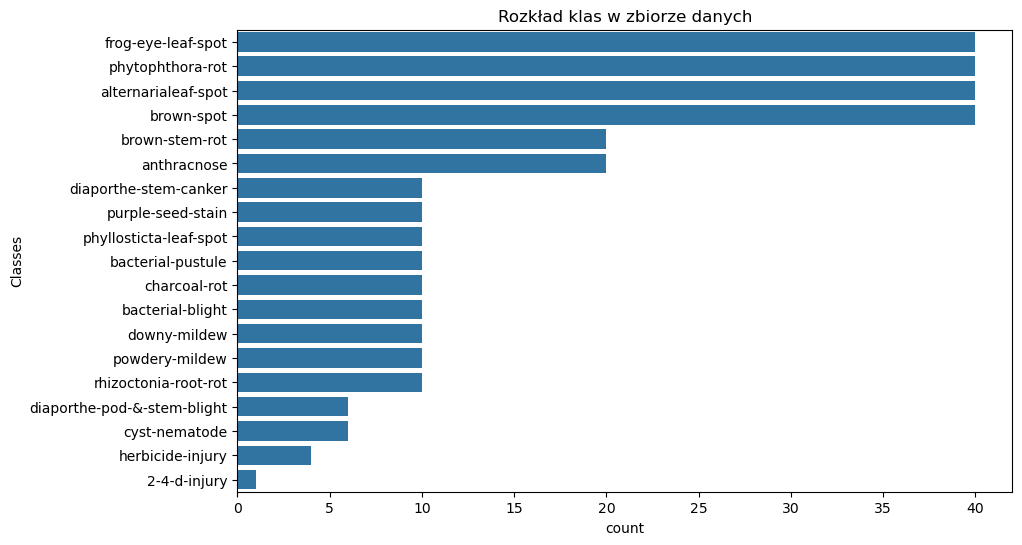

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(y=df['Classes'], order=df['Classes'].value_counts().index)
plt.title("Rozkład klas w zbiorze danych")
plt.show()

<h3>Wizualizacja brakujących danych</h3>

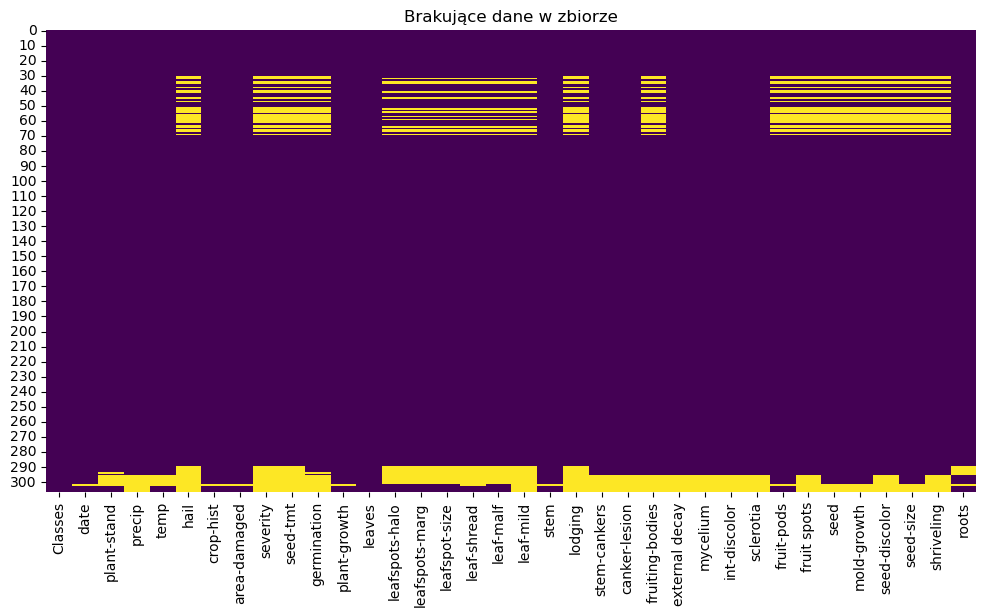

In [17]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Brakujące dane w zbiorze")
plt.show()

<h1>3. Przygotowanie danych</h1>

<h3>Usuwanie klas z bardzo małą liczbą próbek</h3>

In [20]:
class_counts = df['Classes'].value_counts()
rare_classes = class_counts[class_counts < 2].index
df = df[~df['Classes'].isin(rare_classes)]

<h3>a) Czyszczenie danych (uzupełnianie brakujących wartości)</h3>

In [22]:
num_cols = df.select_dtypes(include="number").columns
cat_cols = df.select_dtypes(include="object").columns

<h3>Uzupełnianie brakujących wartości dla cech numerycznych</h3>

In [24]:
imputer_num = SimpleImputer(strategy="mean")
df[num_cols] = imputer_num.fit_transform(df[num_cols])

<h3>Uzupełnianie brakujących wartości dla cech kategorycznych</h3>

In [26]:
imputer_cat = SimpleImputer(strategy="most_frequent")
df[cat_cols] = imputer_cat.fit_transform(df[cat_cols])

<h3>b) Wybór cech</h3>

In [28]:
X = df.drop(columns=["Classes"])
y = df["Classes"]

embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100), max_features=35)
embeded_rf_selector.fit(X, y)

embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')

X = df[embeded_rf_feature]

12 selected features


<h3>Przekształcenie etykiet na numeryczne</h3>

In [30]:
y = LabelEncoder().fit_transform(y)

<h3>c) Przekształcenia danych (normalizacja)</h3>

In [32]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

<h1>4. Tworzenie modelu i ocena algorytmów</h1>

<h3>a) Podział zbioru danych</h3>

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

<h3>b) Algorytm 1: Random Forest</h3>

In [37]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

<h3>Algorytm 2: Decision Tree</h3>

In [39]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)

<h3>c) Wyniki i porównanie</h3>

In [41]:
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_preds))
print("Accuracy:", accuracy_score(y_test, rf_preds))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.75      0.78        12
           1       1.00      0.83      0.91         6
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         3
           4       0.92      1.00      0.96        12
           5       1.00      1.00      1.00         6
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         3
          11       0.75      0.75      0.75        12
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         3
          14       0.92      1.00      0.96        12
          15       1.00      1.00      1.00         3
          16       1.00      1.00      1.00 

In [42]:
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, dt_preds))
print("Accuracy:", accuracy_score(y_test, dt_preds))


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.75      0.78        12
           1       1.00      0.83      0.91         6
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         3
           4       0.85      0.92      0.88        12
           5       1.00      0.83      0.91         6
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         3
          11       0.69      0.75      0.72        12
          12       0.50      1.00      0.67         1
          13       0.67      0.67      0.67         3
          14       0.92      1.00      0.96        12
          15       1.00      1.00      1.00         3
          16       1.00      0.67      0.80

<h3>d) Przykładowy wynik klasyfikacji</h3>

In [44]:
print("\nPrzykładowy wynik (Random Forest):")
print(f"Prawdziwa klasa: {y_test[0]} | Predykcja: {rf_preds[0]}")
print(f"Prawdziwa klasa: {y_test[45]} | Predykcja: {rf_preds[45]}")
print(f"Prawdziwa klasa: {y_test[89]} | Predykcja: {rf_preds[89]}")
print(f"Prawdziwa klasa: {y_test[90]} | Predykcja: {rf_preds[90]}")
print(f"Prawdziwa klasa: {y_test[91]} | Predykcja: {rf_preds[91]}")


Przykładowy wynik (Random Forest):
Prawdziwa klasa: 2 | Predykcja: 2
Prawdziwa klasa: 17 | Predykcja: 17
Prawdziwa klasa: 11 | Predykcja: 11
Prawdziwa klasa: 12 | Predykcja: 12
Prawdziwa klasa: 0 | Predykcja: 11


<h3>e) Czynności poprawiające wynik</h3>

Optymalizacja wyników może obejmować:
1. Wypróbowanie innych algorytmów klasyfikacji, takich jak SVM, KNN lub gradient boosting.
2. Zastosowanie technik walidacji krzyżowej, aby lepiej oszacować wydajność modelu.
3. Dostosowanie hiperparametrów modeli (np. za pomocą GridSearchCV lub RandomizedSearchCV).
4. Użycie metod selekcji cech, aby wyeliminować cechy mniej istotne.
5. Usprawnienie normalizacji lub skalowania danych.

<h1>5. Podsumowanie</h1>

W projekcie przeanalizowałem zbiór danych "Soybean (Large)" dotyczący klasyfikacji chorób soi. Zastosowałem dwie metody klasyfikacji: Random Forest i Decision Tree. Algorytm Random Forest osiągnął wyższą dokładność w porównaniu z Decision Tree. Usunięcie rzadkich klas poprawiło jakość danych i pozwoliło na skuteczniejsze szkolenie modeli. Można rozważyć zastosowanie bardziej zaawansowanych technik, takich jak optymalizacja hiperparametrów czy walidacja krzyżowa.

Wyniki sugerują, że dane dobrze nadają się do klasyfikacji, ale wymagają starannego przetwarzania w celu uzyskania najlepszych wyników. 